# Rolling 7-day case totals in Canada
*April 15, 2022*

Let's do a very simple check in on COVID-19 cases in Canada. Instead of the usual rolling 7-day average, we'll do rolling 7-day totals.

First, import pandas and set format for our float values (so we don't get the annoying scientific notation on them).

In [17]:
import pandas as pd

pd.options.display.float_format = '{:,}'.format

Then, read in data.

In [18]:
raw = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')

raw.sample(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
4302,59,British Columbia,Colombie-Britannique,2020-12-19,NaN,46052,0.0,752,46052,"904,763.0",...,4.64,4557,87.39,126,2.42,651.0,12.48,18.0,0.35,644.11
1234,13,New Brunswick,Nouveau-Brunswick,2020-05-28,NaN,126,0.0,0,126,"21,980.0",...,0.0,5,0.63,0,0.0,0.71,0.09,0.0,0.0,15.2
2662,60,Yukon,Yukon,2020-08-31,NaN,15,0.0,0,15,"2,562.0",...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,34.9


Now we filter for only Canada data, pivot to reshape the table into a more useful shape, then apply the rolling method.

In [19]:
data = (raw
       .loc[(raw["prname"] == "Canada")]
       .pivot(columns="prname", index="date", values="numtoday")
       .rolling(7).sum()
       )

I'll also Filter for only values after November 1, 2021. Note that we do this AFTER applying rolling, otherwise you lose 7 days off the front of your dataset! 

In [20]:
data = data.loc[data.index >= "2021-11-01"].dropna()

Now, let's plot it.

<AxesSubplot:xlabel='date'>

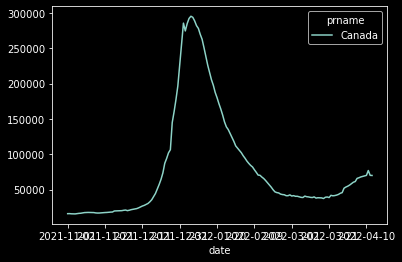

In [21]:
all.plot()

Easy. I'll copy this data over to datawrapper for the public presentation (final result [here](https://www.datawrapper.de/_/uKsJo/)).

\-30\-